In [1]:
import numpy as np
import time
from cvxopt import matrix, solvers
import functools
import matplotlib.pyplot as plt

In [2]:
n = 100
# 设定随机数种子，使每一次运行得到相同的结果
np.random.seed(42)

In [3]:
# 随即初始化得到训练样本，注意每一个样本x是一个三维向量，且第三维的值始终为1
X_low = 5 + np.random.rand(n,2)*10
X_high = 20+np.random.rand(n,2)*10
X_train = np.vstack((X_low, X_high))
Y_train = np.ones((2*n,), dtype=int)
# 强行让训练样本线性可分，其中1表示正样本，-1表示负样本
Y_train[X_train[:, 1] > 17] = -1

dataset1 = {'X': X_train, 'Y': Y_train}

In [4]:
print('X_train:\t\t\t\t\t\t\tY_train:')
X, Y = dataset1['X'], dataset1['Y']
for i in range(len(X)):
    print('\t{: }\t{: }\t\t{:+}'.format(*X[i], Y[i]))

X_train:							Y_train:
	 8.745401188473625	 14.50714306409916		+1
	 12.31993941811405	 10.986584841970366		+1
	 6.560186404424365	 6.559945203362027		+1
	 5.580836121681995	 13.661761457749352		+1
	 11.011150117432088	 12.080725777960454		+1
	 5.2058449429580245	 14.699098521619943		+1
	 13.324426408004218	 7.123391106782762		+1
	 6.818249672071007	 6.834045098534338		+1
	 8.042422429595376	 10.247564316322379		+1
	 9.319450186421157	 7.912291401980419		+1
	 11.118528947223794	 6.394938606520419		+1
	 7.921446485352181	 8.663618432936918		+1
	 9.56069984217036	 12.851759613930136		+1
	 6.996737821583597	 10.142344384136116		+1
	 10.924145688620424	 5.4645041271999775		+1
	 11.075448519014383	 6.705241236872915		+1
	 5.650515929852795	 14.488855372533333		+1
	 14.656320330745594	 13.08397348116461		+1
	 8.046137691733707	 5.976721140063839		+1
	 11.842330265121568	 9.401524937396013		+1
	 6.220382348447789	 9.951769101112703		+1
	 5.343885211152184	 14.093204020787821		+1
	 7.587799816

In [5]:
# 在dataset1的基础上构造线性不可分数据集
X_train = dataset1['X'].copy()
Y_train = dataset1['Y'].copy()
# 强行设置一个样本的值，使得整个数据集线性不可分
X_train[0] = np.array([10.5180034749718639, 10.11005192452767676])
Y_train[0]=-1

dataset2 = {'X': X_train, 'Y': Y_train}

In [6]:
print('X_train:\t\t\t\t\t\t\tY_train:')
X, Y = dataset2['X'], dataset2['Y']
for i in range(len(X)):
    print('\t{: }\t{: }\t\t{:+}'.format(*X[i], Y[i]))

X_train:							Y_train:
	 10.518003474971865	 10.110051924527676		-1
	 12.31993941811405	 10.986584841970366		+1
	 6.560186404424365	 6.559945203362027		+1
	 5.580836121681995	 13.661761457749352		+1
	 11.011150117432088	 12.080725777960454		+1
	 5.2058449429580245	 14.699098521619943		+1
	 13.324426408004218	 7.123391106782762		+1
	 6.818249672071007	 6.834045098534338		+1
	 8.042422429595376	 10.247564316322379		+1
	 9.319450186421157	 7.912291401980419		+1
	 11.118528947223794	 6.394938606520419		+1
	 7.921446485352181	 8.663618432936918		+1
	 9.56069984217036	 12.851759613930136		+1
	 6.996737821583597	 10.142344384136116		+1
	 10.924145688620424	 5.4645041271999775		+1
	 11.075448519014383	 6.705241236872915		+1
	 5.650515929852795	 14.488855372533333		+1
	 14.656320330745594	 13.08397348116461		+1
	 8.046137691733707	 5.976721140063839		+1
	 11.842330265121568	 9.401524937396013		+1
	 6.220382348447789	 9.951769101112703		+1
	 5.343885211152184	 14.093204020787821		+1
	 7.5877998

In [7]:
def drawDataset(dataset, ax, title=None):
    idx1 = np.where(dataset['Y']==-1)[0]
    idx2 = np.where(dataset['Y']==1)[0]
    
    ax.set_title(title)
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_xlim((0,35))
    ax.set_ylim((0,35))
    ax.scatter(dataset['X'][idx1,0], dataset['X'][idx1,1], marker='x', label='negative')
    ax.scatter(dataset['X'][idx2,0], dataset['X'][idx2,1], marker='o', label='positive')
    ax.legend(loc = 'upper right') 

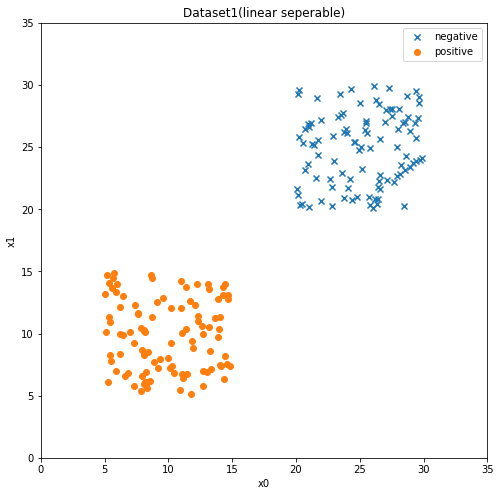

In [8]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
drawDataset(dataset1, ax1, 'Dataset1(linear seperable)')
#drawDataset(dataset2, ax2, 'Dataset2(non linear seperable)')

plt.show()

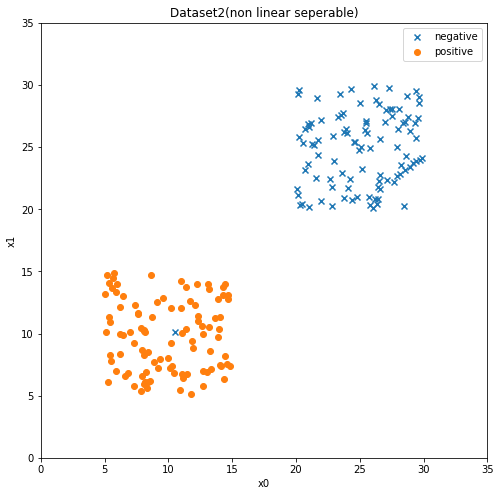

In [9]:
fig, ax2 = plt.subplots(1,1, figsize=(8,8))
#drawDataset(dataset1, ax1, 'Dataset1(linear seperable)')
drawDataset(dataset2, ax2, 'Dataset2(non linear seperable)')

plt.show()

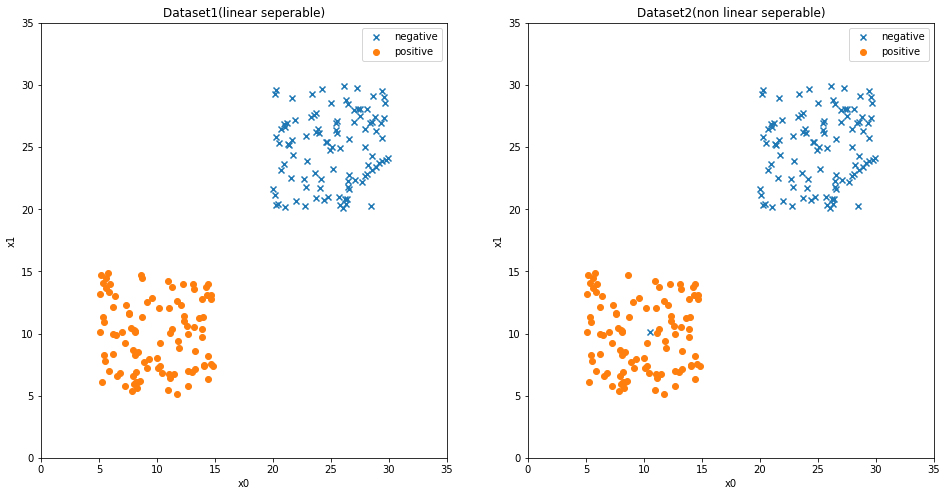

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
drawDataset(dataset1, ax1, 'Dataset1(linear seperable)')
drawDataset(dataset2, ax2, 'Dataset2(non linear seperable)')

plt.show()

In [11]:
def timer(func):
    @functools.wraps(func)
    def wrapper(*args, **kw):
        start_time = time.time()
        result = func(*args, **kw)
        end_time = time.time()
        print(func.__name__+'花费时间'+str(end_time-start_time)+'秒')
        return result
    return wrapper

In [25]:
def projection(line_x, w, b):
    line_y = []
    for x in line_x:
        line_y.append((-b-w[0]*x)/w[1])
    return line_y
def show_with_line(dataset, w, b, ax, title=None):
    X_train = dataset['X']
    Y_train = dataset['Y']
    idx1 = np.where(Y_train==-1)[0]
    idx2 = np.where(Y_train==1)[0]
    ax.scatter(X_train[idx1,0], X_train[idx1,1], marker='x', label='negative')
    ax.scatter(X_train[idx2,0], X_train[idx2,1], marker='o', label='positive')
    
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_xlim((0,35))
    ax.set_ylim((0,35))
    ax.set_title(title)

    line_x = np.linspace(0, 35, 1000)
    line_y = projection(line_x, w, b)
    ax.plot(line_x, line_y, color='black', linewidth=2)
    # 使用fill_between方法进行背景填充
    ax.fill_between(line_x, 35,line_y, color='blue', alpha=0.2)
    ax.fill_between(line_x, line_y,0, color='red', alpha=0.2)

    ax.legend(loc = 'upper right') 

SVM

![](qp.png)

In [12]:
@timer
def SVM(X_train, Y_train, C):
    m, n = X_train.shape
    Y_train=Y_train.reshape(-1,1)*1.
    K = X_train.dot(X_train.T)
    KY = np.outer(Y_train, Y_train)
    H = K*KY
    
    P = matrix(H)
    q = matrix(-np.ones((m, 1)))
    G = matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
    h = matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
    A = matrix(Y_train.reshape(1, -1))
    b = matrix(np.zeros(1))
    # P, q, G, h ,A, b
    result = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(result['x'])
    
    w = np.sum(alphas * Y_train * X_train, axis = 0)
    # get bias
    cond = (alphas > 1e-4).reshape(-1)
    b = Y_train[cond].reshape(-1,) - np.dot(X_train[cond], w)
    print(Y_train[cond].shape)
    return alphas[alphas>1e-4], w.flatten(), b[0]

In [13]:
alphas1, w1, b1 = SVM(dataset1['X'], dataset1['Y'], 10)
alphas2, w2, b2 = SVM(dataset2['X'], dataset2['Y'], 10)

     pcost       dcost       gap    pres   dres
 0: -7.9108e+01 -7.9564e+03  2e+04  5e-01  7e-12
 1: -1.9905e+01 -9.1330e+02  2e+03  3e-02  6e-12
 2:  5.1278e-01 -3.1178e+01  5e+01  8e-04  2e-12
 3:  5.6953e-01 -1.0247e+00  2e+00  8e-06  3e-14
 4:  6.8265e-02 -1.4114e-01  2e-01  2e-16  1e-14
 5: -3.2544e-03 -3.1274e-02  3e-02  2e-16  5e-15
 6: -1.0485e-02 -3.1602e-02  2e-02  3e-16  4e-15
 7: -1.9669e-02 -3.3420e-02  1e-02  2e-16  5e-15
 8: -2.5965e-02 -2.6533e-02  6e-04  2e-16  5e-15
 9: -2.6240e-02 -2.6246e-02  6e-06  2e-16  6e-15
10: -2.6243e-02 -2.6243e-02  6e-08  2e-16  6e-15
Optimal solution found.
(2, 1)
SVM花费时间0.03137063980102539秒
     pcost       dcost       gap    pres   dres
 0: -9.7628e+01 -8.1026e+03  2e+04  5e-01  6e-12
 1: -4.0176e+01 -1.0286e+03  2e+03  3e-02  5e-12
 2: -2.3255e+01 -1.0420e+02  8e+01  6e-05  2e-12
 3: -2.4027e+01 -3.6249e+01  1e+01  8e-06  1e-12
 4: -2.6698e+01 -3.7876e+01  1e+01  5e-06  1e-12
 5: -2.9120e+01 -3.6443e+01  7e+00  3e-06  2e-12
 6: -2.8881e

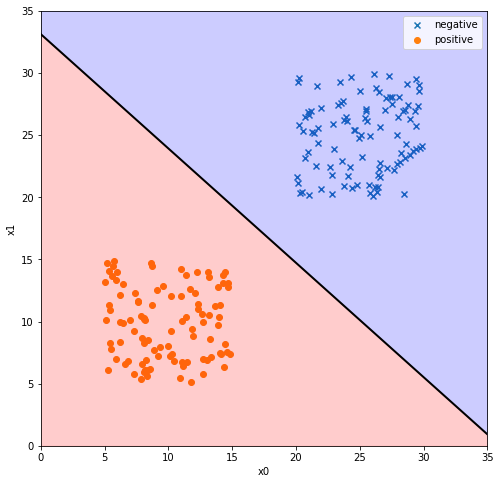

In [28]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
show_with_line(dataset1, w1, b1, ax1, title=None)
plt.show()

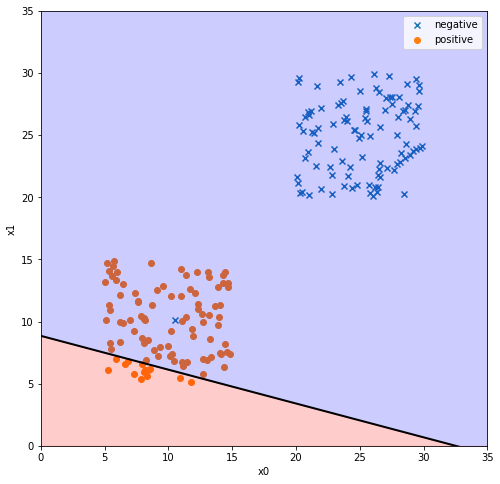

In [29]:
fig, ax2 = plt.subplots(1, 1, figsize=(8,8))
show_with_line(dataset2, w2, b2, ax2, title=None)
plt.show()

In [30]:
from sklearn.svm import SVC
clf = SVC(C = 10, kernel = 'linear')
clf.fit(dataset1['X'], dataset1['Y'].ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[-0.15509501 -0.16861515]]
b =  [5.58448174]
Indices of support vectors =  [145  26]
Support vectors =  [[20.3050025  20.37348189]
 [14.39498942 13.9482735 ]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.02624275 0.02624275]]


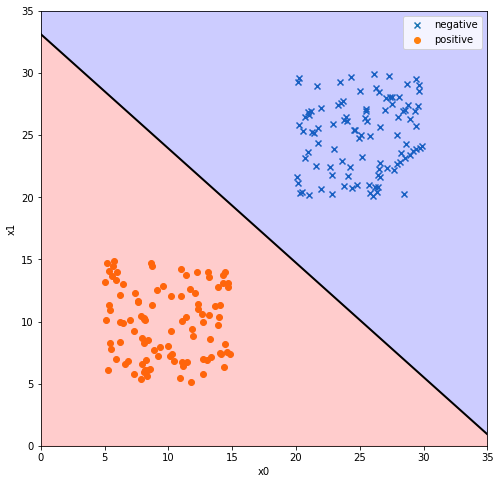

In [32]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
show_with_line(dataset1, clf.coef_[0], clf.intercept_[0], ax1, title=None)
plt.show()

In [33]:
from sklearn.svm import SVC
clf = SVC(C = 10, kernel = 'linear')
clf.fit(dataset2['X'], dataset2['Y'].ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[-0.06615997 -0.24230052]]
b =  [5.27984167]
Indices of support vectors =  [  0 145 185  26  91]
Support vectors =  [[10.51800347 10.11005192]
 [20.3050025  20.37348189]
 [21.00778001 20.18221826]
 [14.39498942 13.9482735 ]
 [14.24693618 13.77339353]]
Number of support vectors for each class =  [3 2]
Coefficients of the support vector in the decision function =  [[10.          2.11159389  3.85215872 10.          5.96375262]]


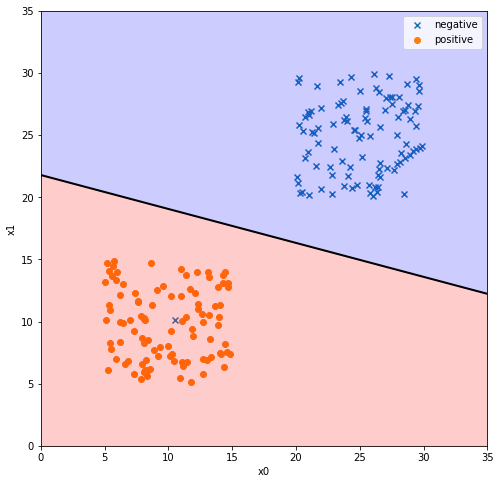

In [34]:
fig, ax2 = plt.subplots(1, 1, figsize=(8,8))
show_with_line(dataset2, clf.coef_[0], clf.intercept_[0], ax2, title=None)
plt.show()

In [17]:
b2

2.1453167960076724

/home/dl/tools/anaconda3/envs/torch/lib/python3.6/site-packages/matplotlib-3.1.1-py3.6-linux-x86_64.egg/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dl/tools/anaconda3/envs/torch/lib/python3.6/site-packages/matplotlib-3.1.1-py3.6-linux-x86_64.egg/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dl/tools/anaconda3/envs/torch/lib/python3.6/site-packages/matplotlib-3.1.1-py3.6-linux-x86_64.egg/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dl/tools/anaconda3/envs/torch/lib/python3.6/site-packages/matplotlib-3.1.1-py3.6-linux-x86_64.egg/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dl/tools/anaconda3/envs/torch/lib/python3.6/site-p

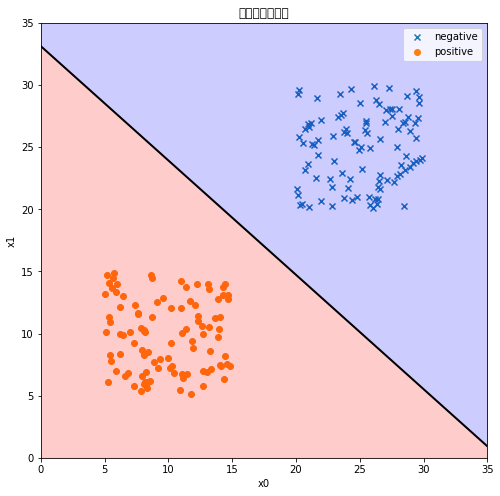

In [23]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
show_with_line(dataset1, w1, b1, ax1, title='线性可分数据集')
plt.show()

/home/dl/tools/anaconda3/envs/torch/lib/python3.6/site-packages/matplotlib-3.1.1-py3.6-linux-x86_64.egg/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dl/tools/anaconda3/envs/torch/lib/python3.6/site-packages/matplotlib-3.1.1-py3.6-linux-x86_64.egg/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0, flags=flags)


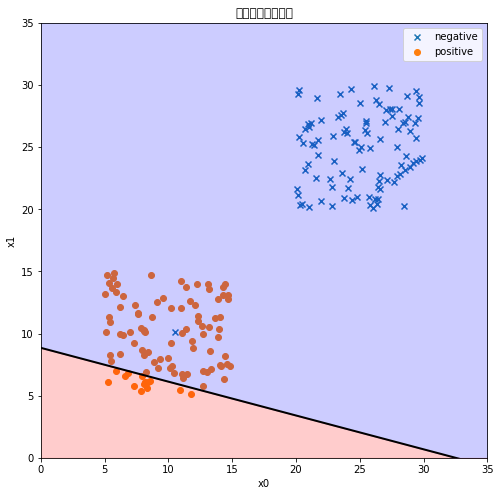

In [24]:
fig, ax2 = plt.subplots(1, 1, figsize=(8,8))
show_with_line(dataset2, w2, b2, ax2, title='线性不可分数据集')
plt.show()

梯度下降方法求解SVM

设计如下损失函数
$$L(w,b)=max(0, 1-y_i(wx_i+b))+\frac{\theta}{2}\lVert w\rVert^2$$

In [35]:
def data_generator(X_train, Y_train, batch_size):
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    total_batchs = len(X) // batch_size
    for i in range(total_batchs):
        yield X[idx[i:i+batch_size]], Y[idx[i:i+batch_size]].reshape(-1, 1)
    if len(X) != total_batchs * batch_size:
        yield X[total_batchs*batch_size:], (Y[total_batchs*batch_size:]).reshape(-1,1)

In [40]:
@timer
def SGDSVM(X_train, Y_train, batch_size=32, theta=0.2, epochs=3000, lr=1e-3):
    w = np.random.rand(2)
    b = np.random.rand()
    history = []
    loss = 0
    for epoch in range(epochs):
        #print('epoch:{}'.format(epoch))
        for x, y in data_generator(X_train, Y_train, batch_size):
            N = len(x)
            k = y*(x.dot(w) + b).reshape(-1,1)
            k = 1-k
            k[k<0] = 0
            loss += k.sum() + 0.5 * theta * w.dot(w)
            
            k[k>0] = 1
            H = -1 * y * x
            dw = (k*H).sum(axis=0) / N + theta*w
            db = (-1*y*k).sum() / N
            w -= lr * dw
            b -= lr * db
        history.append(loss/len(X_train))
        loss = 0
    return w,b, history

In [41]:
w1, b1, history1 = SGDSVM(dataset1['X'], dataset1['Y'])
w2, b2, history2 = SGDSVM(dataset2['X'], dataset2['Y'])

SGDSVM花费时间1.4475829601287842秒
SGDSVM花费时间1.5759079456329346秒


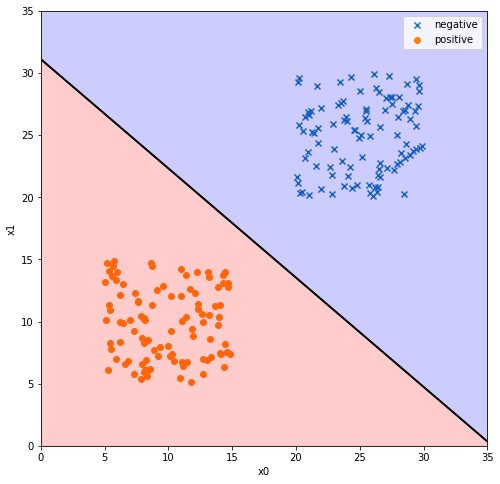

In [38]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
show_with_line(dataset1, w1, b1, ax1)
plt.show()

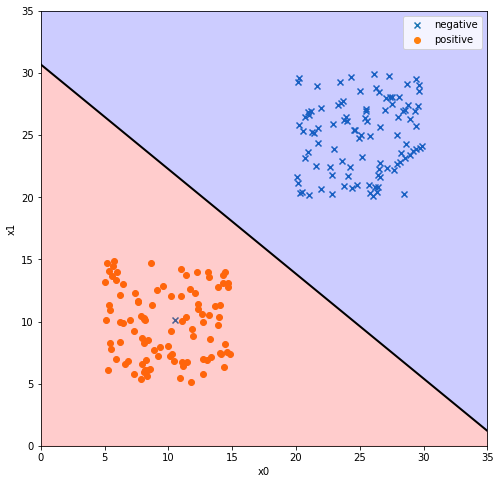

In [39]:
fig, ax2 = plt.subplots(1, 1, figsize=(8,8))
show_with_line(dataset2, w2, b2, ax2)
plt.show()

In [ ]:
history1

In [ ]:
fig = plt.figure(figsize=(8,8))
x = list(range(len(history1)))
plt.plot(x, history1)
plt.show()

In [ ]:
len(history1)